This is the baseline for the project. This will be implemented as various classifier models over the 29,950 training instances (15k fire = 0, 14,950 fire = 1).

In [ ]:
# Standard library imports
import os

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.model_selection import train_test_split

# Load dataset
DATA_PATH = "../data/final_combined_dataset.csv"
data = pd.read_csv(DATA_PATH)

# Prepare features and target
X = data.drop("FIRE", axis=1)
y = data['FIRE']

# Split data into training and testing sets
# Using 80/20 split with fixed random state for reproducibility
RANDOM_STATE = 1234
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(
    X, y, data, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

# Display dataset shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

(23960, 13)
(5990, 13)
(23960,)
(5990,)


/home/paul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,name,Training Accuracy,Eval Accuracy,Training Recall,Eval Recall,Training Precision,Eval Precision,Training F1,Eval F1
0,Random Forest,1.000000,0.976795,1.000000,0.983651,1.000000,0.969453,1.000000,0.976500
1,Decision Tree,1.000000,0.966778,1.000000,0.967984,1.000000,0.964371,1.000000,0.966174
2,Logistic Regression,0.925417,0.922538,0.946396,0.935967,0.908655,0.908730,0.927142,0.922148
3,Multilayer Perceptron,0.501419,0.490150,1.000000,1.000000,0.501419,0.490150,0.667927,0.657853



Training Random Forest...


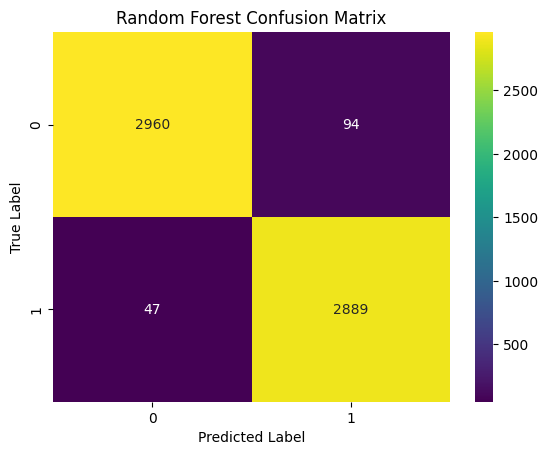


Training Decision Tree...


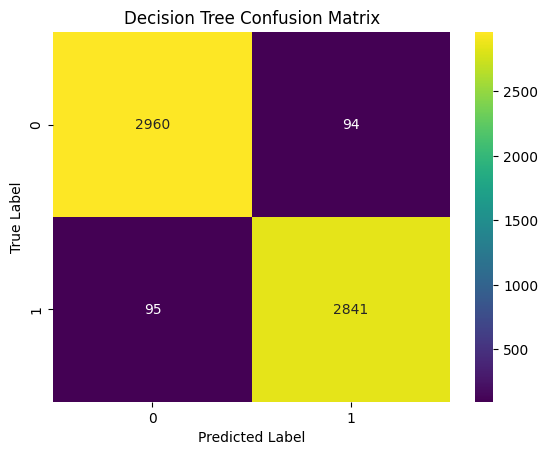


Training Logistic Regression...


/home/paul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


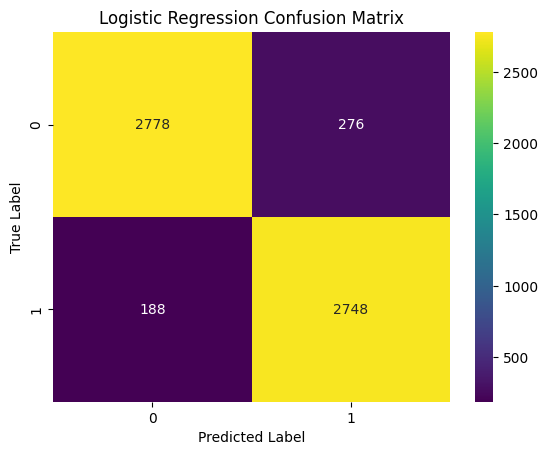


Training Multilayer Perceptron...


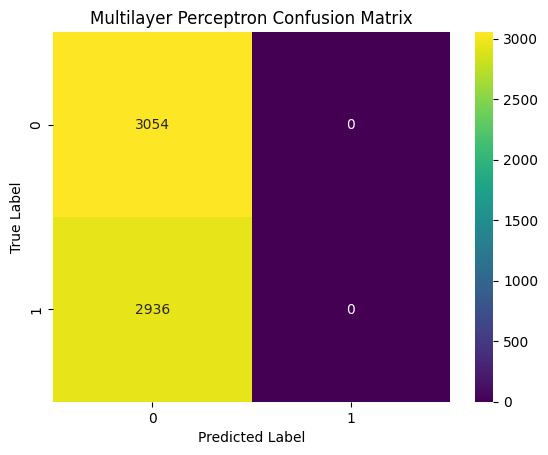

In [ ]:
# Scikit-learn imports
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)


def evaluate_pipelines(pipelines, X_train, y_train, X_evaluate, y_evaluate):
    """
    Evaluate multiple ML pipelines and return performance metrics.
    
    Parameters:
    -----------
    pipelines : list of tuples
        List of (name, pipeline) tuples to evaluate
    X_train : array-like
        Training features
    y_train : array-like
        Training labels
    X_evaluate : array-like
        Evaluation features
    y_evaluate : array-like
        Evaluation labels
    
    Returns:
    --------
    pd.DataFrame
        DataFrame containing performance metrics for each pipeline
    """
    rows = []
    for name, pipeline in pipelines:
        # Fit pipeline on training data
        pipeline.fit(X_train, y_train)
        
        # Generate predictions
        train_preds = pipeline.predict(X_train)
        eval_preds = pipeline.predict(X_evaluate)
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, train_preds)
        eval_accuracy = accuracy_score(y_evaluate, eval_preds)
        
        train_recall = recall_score(y_train, train_preds)
        eval_recall = recall_score(y_evaluate, eval_preds)
        
        train_precision = precision_score(y_train, train_preds)
        eval_precision = precision_score(y_evaluate, eval_preds)
        
        train_f1 = f1_score(y_train, train_preds)
        eval_f1 = f1_score(y_evaluate, eval_preds)
        
        rows.append({
            'name': name,
            'Training Accuracy': train_accuracy,
            'Eval Accuracy': eval_accuracy,
            'Training Recall': train_recall,
            'Eval Recall': eval_recall,
            'Training Precision': train_precision,
            'Eval Precision': eval_precision,
            'Training F1': train_f1,
            'Eval F1': eval_f1
        })
    
    return pd.DataFrame(rows)


def plot_confusion_matrix(y_true, y_pred, clf_name):
    """
    Plot confusion matrix for model predictions.
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like
        Predicted labels
    clf_name : str
        Name of the classifier for the plot title
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='viridis')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{clf_name} Confusion Matrix')
    plt.tight_layout()
    plt.show()


# Initialize baseline models
models = {
    'Random Forest': make_pipeline(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Decision Tree': make_pipeline(DecisionTreeClassifier(random_state=RANDOM_STATE)),
    'Logistic Regression': make_pipeline(
        LogisticRegression(random_state=RANDOM_STATE, max_iter=10000)
    ),
    'Multilayer Perceptron': make_pipeline(
        MLPClassifier(max_iter=10000, random_state=RANDOM_STATE)
    )
}

# Convert to list of tuples for evaluation
pipelines = [(name, model) for name, model in models.items()]

# Evaluate all models
results_df = evaluate_pipelines(pipelines, X_train, y_train, X_test, y_test)
display(results_df)

# Generate confusion matrices for all models
print("\n" + "="*50)
print("Generating Confusion Matrices")
print("="*50)

for name, clf in pipelines:
    print(f"\nTraining {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)
